In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', 100)

## 3.1

In [2]:
ipl = pd.read_csv('ipl_matches.csv')
ipl.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
ipl.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [10]:
[i for i in ipl.columns if "win_by" in i]

# [ i for i in df.columns if 'genre' in i]
# [i for i in df.columns if 'cvotes' in i]
# [i for i in df.columns if 'votes' in i]

['win_by_runs', 'win_by_wickets']

In [11]:
df_by_genre = ipl[['team1', 'team2','win_by_runs', 'win_by_wickets']]

In [13]:
df_by_genre['cnt']  = 1

C:\Users\SUMITH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
df_by_genre.head()

,team1,team2,win_by_runs,win_by_wickets,cnt
0,Sunrisers Hyderabad,Royal Challengers Bangalore,35,0,1
1,Mumbai Indians,Rising Pune Supergiant,0,7,1
2,Gujarat Lions,Kolkata Knight Riders,0,10,1
3,Rising Pune Supergiant,Kings XI Punjab,0,6,1
4,Royal Challengers Bangalore,Delhi Daredevils,15,0,1


In [28]:
g1 = df_by_genre.groupby("team1").sum()
g2 = df_by_genre.groupby("team2").sum()

In [29]:
g1.head()

,win_by_runs,win_by_wickets,cnt
team1,,,
Chennai Super Kings,1785,228,89
Deccan Chargers,421,148,43
Delhi Capitals,92,17,6
Delhi Daredevils,700,265,72
Gujarat Lions,1,78,14


In [30]:
g2.head()

,win_by_runs,win_by_wickets,cnt
team2,,,
Chennai Super Kings,573,289,75
Deccan Chargers,539,72,32
Delhi Capitals,134,29,10
Delhi Daredevils,1453,275,89
Gujarat Lions,214,65,16


In [31]:
df_add = g1.add(g2, fill_value = 0)

In [32]:
df_add.head()

,win_by_runs,win_by_wickets,cnt
team1,,,
Chennai Super Kings,2358,517,164
Deccan Chargers,960,220,75
Delhi Capitals,226,46,16
Delhi Daredevils,2153,540,161
Gujarat Lions,215,143,30


**ONLY FOR THIS DEMO, I AM USING THE FILTER AS CNT>=100 BUT FOR YOUR ASSIGNMENT THE FILTER IS CNT>=10**

In [33]:
genre_top_10 = df_add[df_add['cnt']>=100]

In [34]:
genre_top_10.head()

,win_by_runs,win_by_wickets,cnt
team1,,,
Chennai Super Kings,2358,517,164
Delhi Daredevils,2153,540,161
Kings XI Punjab,2257,594,176
Kolkata Knight Riders,1971,646,178
Mumbai Indians,2874,583,187


In [35]:
genre_top_10.iloc[:, 0:2] = genre_top_10.iloc[:, 0:2].divide(genre_top_10['cnt'], axis = 0)

C:\Users\SUMITH\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [36]:
genre_top_10.head()

,win_by_runs,win_by_wickets,cnt
team1,,,
Chennai Super Kings,14.378049,3.152439,164
Delhi Daredevils,13.372671,3.354037,161
Kings XI Punjab,12.823864,3.375000,176
Kolkata Knight Riders,11.073034,3.629213,178
Mumbai Indians,15.368984,3.117647,187


In [37]:
genre_top_10.iloc[:, 0] = round(genre_top_10.iloc[:,0], 2)

C:\Users\SUMITH\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [38]:
genre_top_10.head()

,win_by_runs,win_by_wickets,cnt
team1,,,
Chennai Super Kings,14.38,3.152439,164
Delhi Daredevils,13.37,3.354037,161
Kings XI Punjab,12.82,3.375000,176
Kolkata Knight Riders,11.07,3.629213,178
Mumbai Indians,15.37,3.117647,187


In [39]:
genre_top_10.iloc[:, 1] = genre_top_10.iloc[:, 1].astype(int)

C:\Users\SUMITH\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [40]:
genre_top_10.head()

,win_by_runs,win_by_wickets,cnt
team1,,,
Chennai Super Kings,14.38,3,164
Delhi Daredevils,13.37,3,161
Kings XI Punjab,12.82,3,176
Kolkata Knight Riders,11.07,3,178
Mumbai Indians,15.37,3,187


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

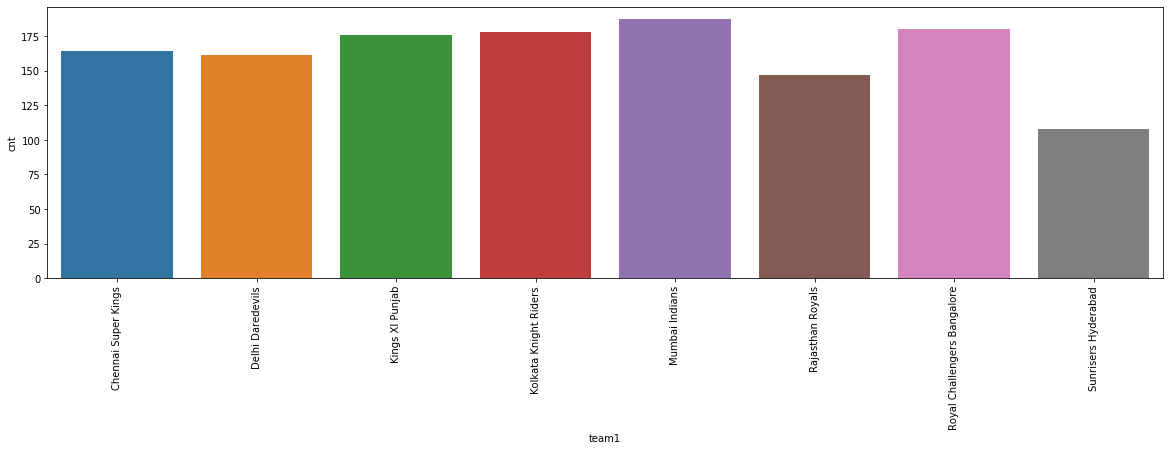

In [68]:
plt.figure(figsize = (20,5))
sns.barplot(x = genre_top_10.index, y = genre_top_10.cnt)
plt.xticks(rotation = 90)

In [45]:
genre_top_10.head()

,win_by_runs,win_by_wickets,cnt
team1,,,
Chennai Super Kings,14.38,3,164
Delhi Daredevils,13.37,3,161
Kings XI Punjab,12.82,3,176
Kolkata Knight Riders,11.07,3,178
Mumbai Indians,15.37,3,187


In [61]:
help(sns.heatmap)

Help on function heatmap in module seaborn.matrix:

heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
    Plot rectangular data as a color-encoded matrix.
    
    This is an Axes-level function and will draw the heatmap into the
    currently-active Axes if none is provided to the ``ax`` argument.  Part of
    this Axes space will be taken and used to plot a colormap, unless ``cbar``
    is False or a separate Axes is provided to ``cbar_ax``.
    
    Parameters
    ----------
    data : rectangular dataset
        2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
        is provided, the index/column information will be used to label the
        columns and rows.
    vmin, vmax : floats, optional
        Values to anchor the colormap, otherwise the

(8.0, 0.0)

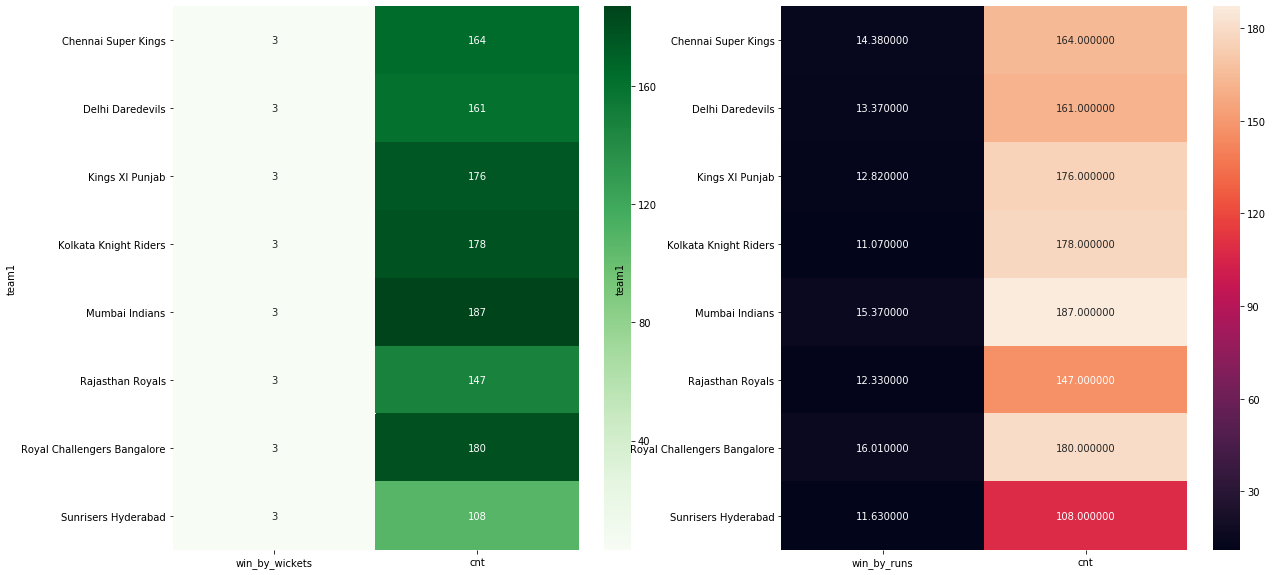

In [66]:
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
ax = sns.heatmap(genre_top_10[['win_by_wickets', 'cnt']], annot = True, fmt = 'd', cmap = 'Greens')
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)

plt.subplot(1,2,2)
ax = sns.heatmap(genre_top_10[['win_by_runs', 'cnt']], annot = True, fmt = 'f')
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)

In [51]:
ipl.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


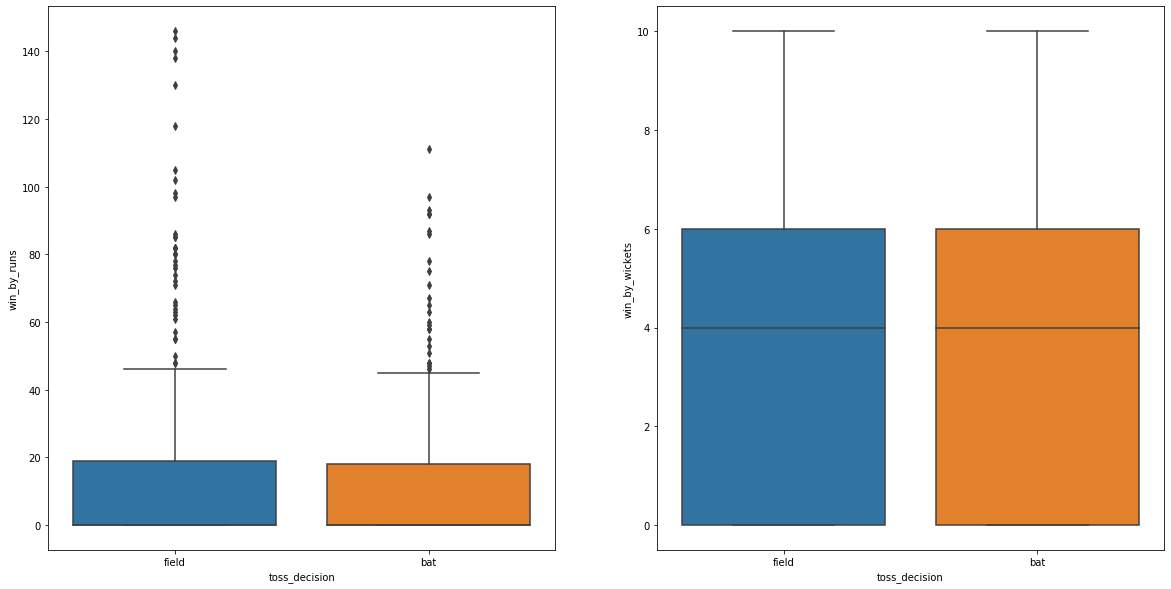

In [54]:
plt.figure(figsize = (20, 10))
plt.subplot(1,2,1)
sns.boxplot(x = 'toss_decision', y = 'win_by_runs', data = ipl)

plt.subplot(1,2,2)
sns.boxplot(x = 'toss_decision', y = 'win_by_wickets', data = ipl)

In [55]:
ipl.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [56]:
top_trio = ipl.head()

In [57]:
top_trio

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [60]:
top_trio[['team1', 'team2', 'toss_winner']].values.tolist()

[['Sunrisers Hyderabad',
  'Royal Challengers Bangalore',
  'Royal Challengers Bangalore'],
 ['Mumbai Indians', 'Rising Pune Supergiant', 'Rising Pune Supergiant'],
 ['Gujarat Lions', 'Kolkata Knight Riders', 'Kolkata Knight Riders'],
 ['Rising Pune Supergiant', 'Kings XI Punjab', 'Kings XI Punjab'],
 ['Royal Challengers Bangalore',
  'Delhi Daredevils',
  'Royal Challengers Bangalore']]

In [69]:
ipl.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [72]:
top_10 = ipl.sort_values(by = 'win_by_runs', ascending = False).head(10)

In [73]:
top_10

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
43,44,2017,Delhi,2017-05-06,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan,NaN
619,620,2016,Bangalore,2016-05-14,Royal Challengers Bangalore,Gujarat Lions,Gujarat Lions,field,normal,0,Royal Challengers Bangalore,144,0,AB de Villiers,M Chinnaswamy Stadium,AY Dandekar,VK Sharma,NaN
59,60,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
556,557,2015,Bangalore,2015-05-06,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Royal Challengers Bangalore,138,0,CH Gayle,M Chinnaswamy Stadium,RK Illingworth,VA Kulkarni,NaN
410,411,2013,Bangalore,2013-04-23,Royal Challengers Bangalore,Pune Warriors,Pune Warriors,field,normal,0,Royal Challengers Bangalore,130,0,CH Gayle,M Chinnaswamy Stadium,Aleem Dar,C Shamshuddin,NaN
706,11147,2019,Hyderabad,31/03/19,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,118,0,J Bairstow,Rajiv Gandhi Intl. Cricket Stadium,S Ravi,KN Anantapadmanabhan,C Shamshuddin
295,296,2011,Dharamsala,2011-05-17,Kings XI Punjab,Royal Challengers Bangalore,Kings XI Punjab,bat,normal,0,Kings XI Punjab,111,0,AC Gilchrist,Himachal Pradesh Cricket Association Stadium,Asad Rauf,AM Saheba,NaN
114,115,2008,Mumbai,2008-05-30,Rajasthan Royals,Delhi Daredevils,Delhi Daredevils,field,normal,0,Rajasthan Royals,105,0,SR Watson,Wankhede Stadium,BF Bowden,RE Koertzen,NaN
676,7934,2018,Kolkata,09/05/18,Mumbai Indians,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Mumbai Indians,102,0,Ishan Kishan,Eden Gardens,Anil Chaudhary,K Ananthapadmanabhan,Kumar Dharmasena
182,183,2010,Delhi,2010-03-17,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,98,0,SR Tendulkar,Feroz Shah Kotla,BR Doctrove,SK Tarapore,NaN
